### Task-1

Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


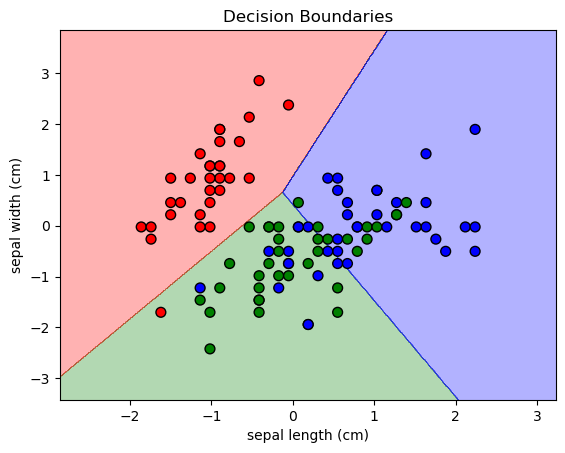

In [5]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

print('\nClassification Report:')
print(classification_report(y_test, y_pred, target_names=iris.target_names))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Optional: Visualize the decision boundaries (only if you want to visualize)
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_boundaries(X, y, model, ax, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('red', 'green', 'blue')))
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50, cmap=ListedColormap(('red', 'green', 'blue')))
    ax.set_title(title)
    ax.set_xlabel(iris.feature_names[0])
    ax.set_ylabel(iris.feature_names[1])

# Only plotting first two features for visualization
X_vis = X_train[:, :2]
model.fit(X_vis, y_train)
fig, ax = plt.subplots()
plot_decision_boundaries(X_vis, y_train, model, ax, "Decision Boundaries")
plt.show()

## Task-2

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset (assuming CSV format)
# Replace 'unemployment_data.csv' with the path to your dataset
df = pd.read_csv('unemployment_data.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Exploratory Data Analysis (EDA)
print("\nSummary statistics:")
print(df.describe())

# Plot the unemployment rate over time
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Unemployment_Rate'], label='Unemployment Rate', color='blue')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.title('Unemployment Rate Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# Fill missing values (if any) using forward fill method
df.fillna(method='ffill', inplace=True)

# Feature Engineering: Create time-based features
df['Year'] = df.index.year
df['Month'] = df.index.month

# Prepare data for modeling
X = df[['Year', 'Month']]
y = df['Unemployment_Rate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nModel Evaluation:\nMean Squared Error: {mse:.2f}\nR^2 Score: {r2:.2f}")

# Plot actual vs predicted unemployment rates
plt.figure(figsize=(10, 5))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.title('Actual vs Predicted Unemployment Rates')
plt.legend()
plt.grid(True)
plt.show()

# Optional: Visualize residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Residuals Distribution')
plt.grid(True)
plt.show()

## Task-3

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset (assuming CSV format)
# Replace 'car_data.csv' with the path to your dataset
df = pd.read_csv('car_data.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Exploratory Data Analysis (EDA)
print("\nSummary statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# Handle missing values (if any)
df.fillna(method='ffill', inplace=True)

# Plot the distribution of car prices
plt.figure(figsize=(10, 5))
sns.histplot(df['Price'], kde=True)
plt.xlabel('Price')
plt.title('Distribution of Car Prices')
plt.grid(True)
plt.show()

# Scatter plot of price vs mileage
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Mileage', y='Price', data=df)
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Price vs Mileage')
plt.grid(True)
plt.show()

# Prepare data for modeling
X = df[['Make', 'Model', 'Year', 'Mileage', 'Engine Size', 'Horsepower']]
y = df['Price']

# Preprocessing: One-hot encoding for categorical features, Standard scaling for numerical features
numeric_features = ['Year', 'Mileage', 'Engine Size', 'Horsepower']
categorical_features = ['Make', 'Model']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Define the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nModel Evaluation:\nMean Squared Error: {mse:.2f}\nR^2 Score: {r2:.2f}")

# Plot actual vs predicted prices
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.grid(True)
plt.show()

# Optional: Visualize residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Residuals Distribution')
plt.grid(True)
plt.show()

## Task-4

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
# Replace 'spam.csv' with the path to your downloaded dataset
df = pd.read_csv('spam.csv', encoding='latin-1')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Drop unnecessary columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

# Rename columns for easier access
df.rename(columns={'v1': 'label', 'v2': 'message'}, inplace=True)

# Display basic dataset information
print("\nDataset Information:")
print(df.info())

# Exploratory Data Analysis (EDA)
print("\nClass distribution:")
print(df['label'].value_counts())

# Plot the distribution of spam and ham messages
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Spam and Ham Messages')
plt.show()

# Preprocess the text data
# Convert labels to binary values
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

# Define a pipeline with a count vectorizer, TF-IDF transformer, and a Naive Bayes classifier
pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Evaluation:\nAccuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Task-5

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset (assuming CSV format)
# Replace 'sales_data.csv' with the path to your dataset
df = pd.read_csv('sales_data.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract date features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['WeekOfYear'] = df['Date'].dt.isocalendar().week

# Drop the 'Date' column as it's no longer needed
df.drop(columns=['Date'], inplace=True)

# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# Fill missing values (if any)
df.fillna(method='ffill', inplace=True)

# Exploratory Data Analysis (EDA)
print("\nSummary statistics:")
print(df.describe())

# Plot the distribution of sales
plt.figure(figsize=(10, 5))
sns.histplot(df['Sales'], kde=True)
plt.xlabel('Sales')
plt.title('Distribution of Sales')
plt.grid(True)
plt.show()

# Plot sales over time
plt.figure(figsize=(15, 5))
df.groupby('Date')['Sales'].sum().plot()
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Over Time')
plt.grid(True)
plt.show()

# Prepare data for modeling
X = df.drop(columns=['Sales'])
y = df['Sales']

# Preprocessing: One-hot encoding for categorical features, Standard scaling for numerical features
numeric_features = ['Customers', 'Open', 'Promo', 'SchoolHoliday', 'Year', 'Month', 'Day', 'WeekOfYear']
categorical_features = ['Store', 'StateHoliday']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Define the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nModel Evaluation:\nMean Squared Error: {mse:.2f}\nR^2 Score: {r2:.2f}")

# Plot actual vs predicted sales
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.grid(True)
plt.show()

# Optional: Visualize residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Residuals Distribution')
plt.grid(True)
plt.show()